Fermín Huarte, Noviembre 2023
## Ajuste lineal: cinética de segundo orden

Como primer ejemplo consideramos la cinética de una reacción de segundo orden como la hidrólisis del acetato de etilo en medio básico:
$$
CH_3COO-CH_2CH_3 + OH^- \leftrightarrow CH_3COO^- + CH_3CH_2OH
$$
que sigue una ley cinética del tipo:
$$
v = \frac{-d[AcEt]}{dt} = k [AcEt][OH^-]
$$
Se puede comprobar que, en esta reacción, si preparamos concentraciones iniciales _identicamente iguales_ para ambos reactivos y dado que la estequimetría de la reacción es 1 a 1, las concentraciones de ambos reactivos serán iguales en todo momento y podemos escribir:
$$
v = \frac{-d[AcEt]}{dt} = k [AcEt]^2
$$
Esta _ley diferencial_ se puede integrar para obtener la ley integral:
$$
\frac{1}{[AcEt]} = \frac{1}{[AcEt]_0} + k t
$$

**Primer ejercicio**

Construir un programa que lea los ficheros (Numpy) `kinetics_conc.dat` (concentración del reactivo en mol l$^{-1}$) i `kinetics_time.dat`(tiempo de reacción en s) que *tenéis que descargar previamente*. A continuación debéis realizar una figura con dos paneles: 
- panel izquierdo: representar concentracion vs. tiempo
- panel derecho: representar 1/concentracion vs. tiempo

Dado que son resultados experimentales, los representaremos mediante símbolos, no lineas. Etiquetar correctamente ejes y gráficos

In [3]:
ls /home/fiolhnir/Documentos/Python_for_scientists_2023

data/  LICENSE  notebooks/  papers/  README.md  slides/


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
kconc = np.loadtxt("/home/fiolhnir/Documentos/Python_for_scientists_2023/data/kinetics_conc.dat")

ktime = np.loadtxt("/home/fiolhnir/Documentos/Python_for_scientists_2023/data/kinetics_time.dat")

kconc.size == ktime.size

kconc.size, ktime.size

(60, 60)

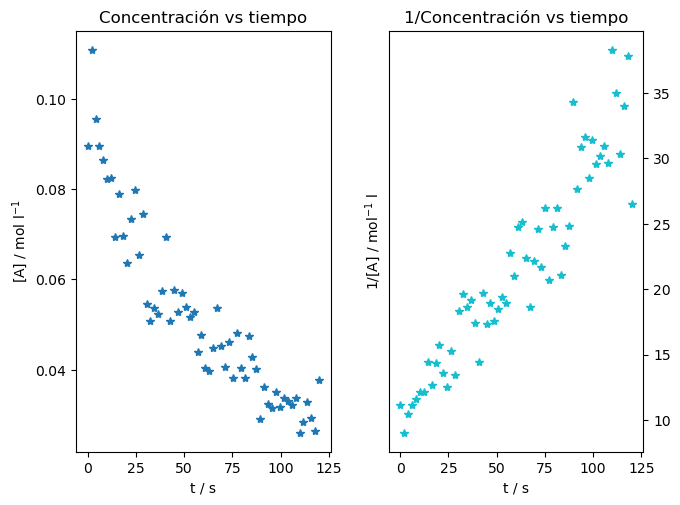

In [26]:
fig, (ax0, ax1) = plt.subplots(1,2)
plt.tight_layout()

# Izquierda
ax0.plot(ktime,kconc,"C0*")
ax0.set_title("Concentración vs tiempo");
ax0.set_xlabel("t / s");
ax0.set_ylabel("[A] / mol l$^{-1}$");

# Derecha
ax1.plot(ktime,1/kconc,"C9*")
ax1.set_title("1/Concentración vs tiempo")         
ax1.set_xlabel("t / s");
ax1.set_ylabel("1/[A] / mol$^{-1}$ l")
ax1.yaxis.tick_right()


---

**Segundo ejercicio**

- Usar la función `np.polyfit`(buscar documentación) para ajustar a una recta los datos de $\frac{1}{[A]} \; vs. \; t$.

- Escribir el valor de la constante cinética (pendiente de la recta)

- Evaluar la función ajustada para 30 valores equiespaciados de tiempo entre 0 i 120 segundos.

- Representar en una única figura $\frac{1}{[A]} \; vs. \; t$ para los datos experimentales (símbolos) y el ajuste (linea). Utilizar una leyenda para distinguir la información.


In [28]:
np.polyfit?

Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See
the documentation of the method for more information.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    poi

In [38]:
x = ktime
y = 1/kconc
params = np.polyfit(x, y, 1)

x_fit = np.linspace(0, 120, 30)
y_fit = np.polyval(params, x) 


ValueError: x and y must have same first dimension, but have shapes (30,) and (60,)

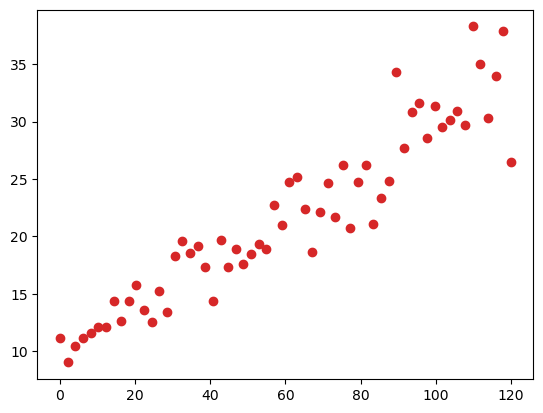

In [39]:
plt.plot(x, y, "C3o", label = "Exp")
plt.plot(x_fit, y_fit, label = "Fit")
plt.legend(frameon = False)

Fermín Huarte, Noviembre 2023
## Ajuste no lineal: curva de Morse

Descargar el fichero `HCl_scan_HFSTO3G.txt` y leerlo (Numpy) como un array 2D. El fichero contiene valores de la energía potencial de la molécula de HCl para distintos valores de la distancia internuclear. Vamos a ajustar los valores de energía a una función de tipo [Morse](https://en.wikipedia.org/wiki/Morse_potential):

$V(r) = D_e \left ( 1 - e^{-\alpha(r-r_0)} \right) ^2$

usando el módulo `scipy.optimize` (SciPy) y su función curve_fit para el ajuste.


In [51]:
data = np.loadtxt("/home/fiolhnir/Documentos/Python_for_scientists_2023/data/HCl_scan_HFSTO3G.txt")
r = data[:,0]
E = data[:,1]
E = E - np.min(E)

In [52]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

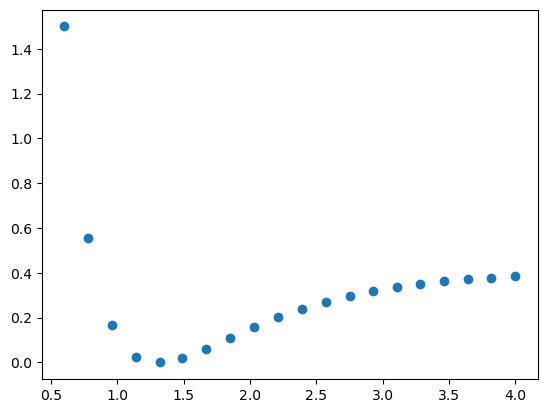

In [53]:
plt.plot(r, E, "C0o")

In [59]:
import scipy.constants as scc

In [56]:
scc?

Type:        module
String form: <module 'scipy.constants' from '/opt/anaconda/lib/python3.11/site-packages/scipy/constants/__init__.py'>
File:        /opt/anaconda/lib/python3.11/site-packages/scipy/constants/__init__.py
Docstring:  
Constants (:mod:`scipy.constants`)

.. currentmodule:: scipy.constants

Physical and mathematical constants and units.


Mathematical constants

================  =================================================================
``pi``            Pi
``golden``        Golden ratio
``golden_ratio``  Golden ratio
================  =================================================================


Physical constants

===========================  =================================================================
``c``                        speed of light in vacuum
``speed_of_light``           speed of light in vacuum
``mu_0``                     the magnetic constant :math:`\mu_0`
``epsilon_0``                the electric constant (vacuum permittivity), :math

In [60]:
def morse(r, DE, alpha, r0):
    return DE*(1 - np.exp(-alpha*(r-r0)))**2

In [63]:
pars, other = curve_fit(morse, r, E)
pars

array([0.37962153, 1.56467281, 1.29706896])

In [64]:
De_opt = pars[0]
alpha_opt =  pars[1]
r0_opt = pars[2]

In [65]:
E_fit = morse(r, De_opt, alpha_opt, r0_opt)

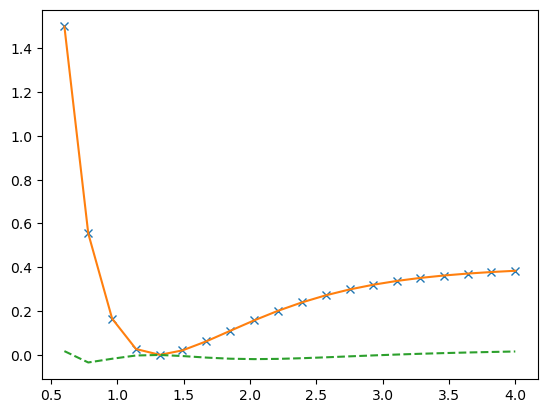

In [73]:
plt.plot(r, E, "x", label = "HF/ST03G")
plt.plot(r, E, label = "HF/ST03G")
plt.plot(r, E-E_fit, "--", label = "Residuals")